# Project: Investigate a Dataset - TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
In this project I take a deep dive into the TMDB movie-data. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I want to figure out 3 things so as to be able to make data-driven decisions; 
1. the effect of inflation on production to aim at making provision for inflation when preparing budgets, 
2. identify the most popular and most profitable genres for success probability, 
3. to identify most experienced directors.

*Contain*:

Total Rows = 10866

Total Columns = 21

After Seeing the dataset we can say that some columns is contain null values

This data set contains 21 columns :

id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj

**N/B**: Most of the columns names has self explained the content of the column
### Question(s) for Analysis
1. What is the effect of inflation on over time?
2. What is the most popular and most profitable genres?
3. Which director made the highest number of movies or the least and their ranking?

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In this stage, I check for duplicate values, null values, I drop colums that I wouldn't need to answer the questions in my analysis,I rename columns to easily identify them, I check for incorrect column data type and replace with the right data type

The steps I took in my data wrangling phase are highlighted below:

Check the head and the tail of the dataset, which are the first 5 and the last 5 rows in the dataset. This is used to quickly check if the dataset set has the right type of data in it.
1. I use the describe() function to view basic statistical details of the dataset
2. I print the information of the dataset using the .info() function. This typically contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)
3. I check for duplicate values using the .duplicated() method and summing it up. The result of the sum should be 0 if there are no duplicate values
4. Next I check for null values using the .isna values, sum it up and filled the null values with zero using 'fillna' function, then checked again. This will return 0 if there are no null values
5. I drop colums I will not be using for my analysis with the .drop method, and use the .head method to check my new dataset
6. I convert the release date into datetime format 
7. I rename some columns using the .rename function and created new columns
8. I also checked for runtimes that are zero and drop them

In [3]:
#Import the CSV file that contains the dataset I'm going to be investigating - TMDB movies data
#Checks the first 2 rows of the dataset
pd.options.display.max_rows = 10865
tmdb = pd.read_csv(r'Database_TMDb_movie_data/tmdb-movies.csv')
tmdb.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
#print concise summary of the dataset
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#checking for missing values
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning

In [6]:
#Checks if there are any duplicated data. 0 means there are no duplicated data 
tmdb.duplicated().sum()

1

In [7]:
#remove duplicates
tmdb.drop_duplicates(inplace = True)
print(tmdb.shape)

(10865, 21)


In [8]:
#count total rows in each column which contain null values
tmdb.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#fill the null values with zero using 'fillna' function
tmdb.fillna('unknown', inplace=True)
tmdb.isnull().sum().sum()

0

In [10]:
#changing format Of release date into datetime format
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])
tmdb['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [11]:
#remove the unused colums that are not needes in the analysis process
tmdb.drop(['overview','imdb_id','homepage','tagline','keywords','production_companies'],axis =1,inplace = True)
print(tmdb.shape)

(10865, 15)


In [12]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10865 non-null object
director          10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 1.3+ MB


In [13]:
#create new columns
tmdb['profit_adj']=tmdb['revenue_adj']-tmdb['budget_adj']
tmdb['profit']=tmdb['revenue']-tmdb['budget']
tmdb['inflation_rate']=tmdb['profit_adj']-tmdb['profit']
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10865 non-null object
director          10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
profit_adj        10865 non-null float64
profit            10865 non-null int64
inflation_rate    10865 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(7), object(4)
memory usage: 1.6+ MB


In [14]:
#checking useful descriptive statistics for each column
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit,inflation_rate
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,3.381911e+07,2.520261e+07,8.616498e+06
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,1.252194e+08,9.659103e+07,5.552902e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,-4.139124e+08,-1.494550e+08
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,1.293091e+07,9.092453e+06,3.198332e+05
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09,2.544506e+09,1.985739e+09


In [15]:
tmdb['inflation_rate']

0       -1.090829e+08
1       -1.827500e+07
2       -1.481913e+07
3       -1.494550e+08
4       -1.053005e+08
5       -3.183620e+07
6       -2.284840e+07
7       -3.899062e+07
8       -8.661892e+07
9       -5.429696e+07
10      -5.085423e+07
11      -6.390208e+05
12      -1.749562e+06
13      -1.245103e+07
14      -9.000332e+07
15      -8.940855e+06
16      -2.222183e+07
17      -3.108833e+07
18      -3.578829e+07
19      -3.924207e+07
20      -1.522861e+06
21      -4.936811e+06
22      -2.883941e+07
23      -4.237233e+07
24      -8.427763e+06
25      -4.258663e+07
26      -1.182915e+07
27      -2.582430e+07
28      -5.467746e+06
29      -2.002066e+07
30      -2.348428e+06
31      -4.245563e+06
32      -2.068060e+07
33      -9.808887e+06
34      -7.373703e+06
35      -2.352153e+06
36      -1.788375e+06
37      -1.255416e+07
38      -1.724940e+06
39      -4.086112e+06
40      -1.389087e+07
41      -4.031752e+06
42      -3.553516e+05
43      -2.651622e+06
44      -1.410389e+06
45      -3

<a id='eda'></a>
## Exploratory Data Analysis

In this step, I start my analysis in order to answer my questions one after the other.

1. The first is a line graph showing the rate of inflation per year
2. In the second, I used a scatter graph and horizontal bar charts to show the relationship between the popularity and profitability of genres.
3. The data was analysed to show the Director that produced the overall highest number of movies and a bar chart was created to show the Director that produced the current best movie.


### Research Question 1  What is the effect of inflation on over time?

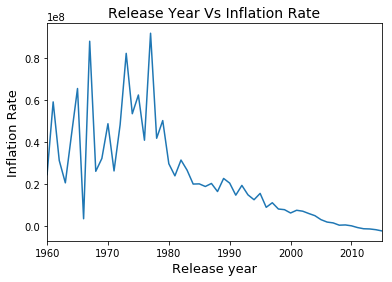

In [16]:
tmdb.groupby('release_year')['inflation_rate'].mean().plot()

#setting up the title and labels of the figure.
plt.title("Release Year Vs Inflation Rate",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Inflation Rate',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

In this graph have been able show that the possible rate of inflation the production company can make provision for is from 0.8% of the expected budget. This will prevent the possibility of adjusting the budget to suit the inflation.

### Research Question 2  What is the most popular and most profitable genres?

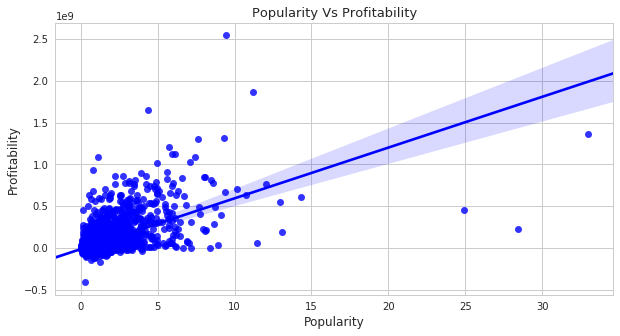

In [17]:
#make a scatter plot using 'regplot' between 'year' and 'vote average'.
ax = sns.regplot(x=tmdb['popularity'],y=tmdb['profit'],color='blue')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Profitability",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profitability",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

In [18]:
df1=tmdb
df1=df1.assign(genres=df1.genres.str.split('|')).explode('genres')
df_geners_popularity=df1.groupby(['genres'],as_index=False)['budget'].mean().sort_values(by=['budget'])
df_geners_popularity

,genres,budget
20,unknown,2.173913e+02
16,TV Movie,2.676647e+05
5,Documentary,5.771491e+05
9,Foreign,1.451435e+06
11,Horror,6.226529e+06
12,Music,9.438628e+06
6,Drama,1.188072e+07
14,Romance,1.253127e+07
3,Comedy,1.329792e+07
13,Mystery,1.611927e+07


Text(0.5,0,'profit')

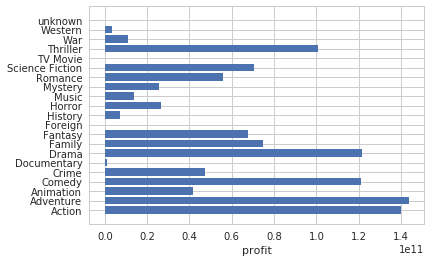

In [21]:
df_geners_profit=df1.groupby(['genres'],as_index=False)['profit_adj'].sum().sort_values(by=['profit_adj'])
df_geners_profit
x2=df_geners_profit['genres']
y2=df_geners_profit['profit_adj']
plt.barh(x2,y2,label='profit')
sns.set_palette("Set1", 20, .65)
plt.xlabel('profit')

Text(0.5,0,'popularity')

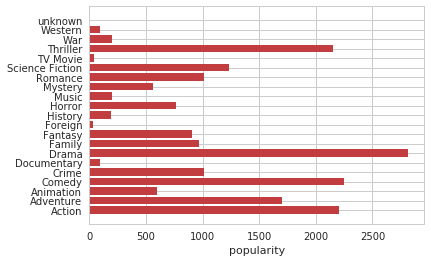

In [22]:
df_geners_popularity=df1.groupby(['genres'],as_index=False)['popularity'].sum().sort_values(by=['popularity'])
df_geners_popularity
x2=df_geners_popularity['genres']
y2=df_geners_popularity['popularity']
plt.barh(x2,y2,label='popularity')
sns.set_palette("Set1", 20, .65)
plt.xlabel('popularity')

In [ ]:
### Research Question 3  Which director that made the highest number of movies and the latest best director?

In [23]:
df2=tmdb
df2.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit,inflation_rate
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,-1.090829e+08
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,228436354,-1.827500e+07


In [24]:
df2.director.value_counts()

Woody Allen                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              45
unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

Obviously Woody Allen is the person that directed the highest number of movies, thus, according to this analysis he is the most experienced  director. Let's dive deeper into our dataset to identify the director that produced the most current best movie

In [30]:
df2.loc[df2['release_year'].idxmax()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit,inflation_rate
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,-1.090829e+08
0,135397,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,-1.090829e+08
0,135397,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,-1.090829e+08
0,135397,32.985763,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,-1.090829e+08
0,135397,32.985763,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,-1.090829e+08


In [44]:
# Filtering the dataset to movies released in 2015 alone
df_dir=df2[df2['release_year']==2015]
df2.loc[df2['release_year'].idxmax()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit,inflation_rate
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,-1.090829e+08
0,135397,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,-1.090829e+08
0,135397,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,-1.090829e+08
0,135397,32.985763,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,-1.090829e+08
0,135397,32.985763,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,-1.090829e+08


In [48]:
director_data = df_dir.groupby('director').mean().vote_average
sort_dir = director_data.sort_values(ascending=False) 
sort_dir.head()

director
Jennifer Siebel Newsom    8.9
Andrew Jarecki            8.4
David Sington             8.2
Don Hertzfeldt            8.2
Evgeny Afineevsky         8.2
Name: vote_average, dtype: float64

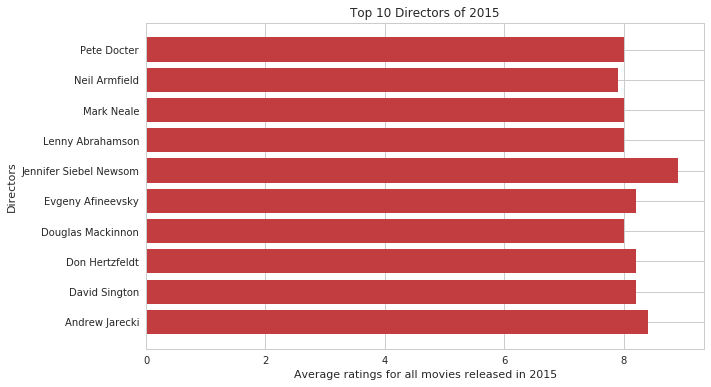

In [37]:
#To visually display the top 10 Directors
plt.subplots(figsize=(10,6))
plt.barh(sort_dir.index[:10],sort_dir[:10])
plt.title('Top 10 Directors of 2015')
plt.xlabel('Average ratings for all movies released in 2015')
plt.ylabel('Directors');

The horizontal bar chart above shows the Top 10(ten) Directors in most current year in our dataset and Jennifer Siebel Newson seems to take the trophy.

<a id='conclusions'></a>
## Conclusions
Results: Our findings suggests that
1. A bank interest of about 0.8 and above  of the initial budget should be set aside as an hedge over inflation 
2. the most popular genre throughout the time provided in this dataset is Drama, but Adventure is the most associated with higher profit
3.  Woody Allenis the director that produced the highest number of movies but in recent time in the data provided Jennifer Siebel directed 

### Limitations
Around 52 % of budget data is zero !! which affects profit calculation greatly. Combined with zero revenue, around 65 % of profit is zero or wrongly calculated
### Reference
1. [`salahbeeh`]'s code(https://github.com/salahbeeh/Udacity-Investigate-Kaggle-TMDB-movie-dataset-/blob/main/Investigate_a_Dataset.ipynb)
2. [`AMSAMMS`]'s code(https://www.kaggle.com/code/amsamms/investigate-tmdb-movie-dataset-udacity-project/notebook)

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])